### Loading the libraries

In [438]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [624]:
train_df = pd.read_csv("train-flattened_v2.csv")
print(train_df.shape)

C:\Users\prash\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(903653, 55)


In [625]:
train_df['trafficSource.adContent'].value_counts()

Google Merchandise Collection                  5122
Google Online Store                            1245
Display Ad created 3/11/14                      967
Full auto ad IMAGE ONLY                         822
Ad from 12/13/16                                610
Ad from 11/3/16                                 489
Display Ad created 3/11/15                      392
{KeyWord:Google Brand Items}                    251
{KeyWord:Google Merchandise}                    155
Ad from 11/7/16                                 123
Google Merchandise                               87
First Full Auto Template Test Ad                 87
20% discount                                     75
{KeyWord:Google Branded Gear}                    67
{KeyWord:Looking for Google Bags?}               65
Swag with Google Logos                           64
Display Ad created 11/17/14                      50
{KeyWord:Want Google Stickers?}                  42
JD_5a_v1                                         41
{KeyWord:Goo

### Sneak Peek at the data

In [626]:
train_df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


### Getting the categorical and numerical columns

In [627]:
cols = train_df.columns
num_cols = train_df._get_numeric_data().columns
factor_cols = list(set(cols) - set(num_cols))

### Getting the count of missing values in the categorical values and plotting the same

Text(0.5,1,'Missing Values in Categorical Features')

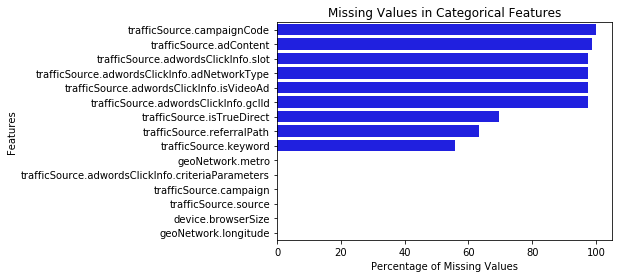

In [628]:
total_test = train_df[factor_cols].isnull().sum().sort_values(ascending=False)
percent = (train_df[factor_cols].isnull().sum()/train_df[factor_cols].isnull().count()).sort_values(ascending=False)*100
data_to_be_removed = pd.concat([total_test, percent], axis=1,join='outer', keys=['Missing Value Count', 'Percentage of Missing Values'])
data_to_be_removed.index.name ='Features'
#data_to_be_removed.head(20)
sns.barplot(y = data_to_be_removed.index[:15],x = data_to_be_removed['Percentage of Missing Values'][:15],color='blue').set_title("Missing Values in Categorical Features")

In [629]:
missing_cols = list(data_to_be_removed[data_to_be_removed['Percentage of Missing Values']>50.0].iloc[:,1].index)

### Getting the count of missing values in the continuous variables and plotting it

Text(0.5,1,'Missing Values in Continuous Features')

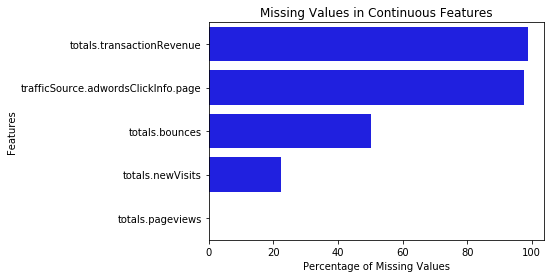

In [630]:
total_test1 = train_df[num_cols].isnull().sum().sort_values(ascending=False)
percent1 = (train_df[num_cols].isnull().sum()/train_df[num_cols].isnull().count()).sort_values(ascending=False)*100
data_to_be_removed1 = pd.concat([total_test1, percent1], axis=1,join='outer', keys=['Missing Value Count', 'Percentage of Missing Values'])
data_to_be_removed1.index.name ='Features'
#data_to_be_removed.head(20)
sns.barplot(y = data_to_be_removed1.index[:5],x = data_to_be_removed1['Percentage of Missing Values'][:5],color='blue').set_title("Missing Values in Continuous Features")

     Note : The feature 'totals.transactionRevenue' is the revenue generated in every session/log in of each user and if it's   missing, it means that no revenue was generated. So, rather than dropping the missing values, we should recode it to 0 in this case


### Now, let's check the number of levels in each categorical feature and we can drop features if they don't have missing values and have just 1 level

In [631]:
## Getting categorical columns with just 1 level
single_level_cols = [cols for cols in train_df[factor_cols].columns if train_df[cols].nunique(dropna=False)==1 ]

unique_vals_df = pd.DataFrame(columns=['Features'])
unique_vals_df['Features'] = single_level_cols

#tt = data_to_be_removed
#tt['Features'] = data_to_be_removed.index
#unique_vals_df = pd.merge(unique_vals_df,tt,on='Features',how='inner')
#unique_vals_df

     Note: It's surprising to see that all the categorical features with just 1 level do not have any missing value and we 
     can remove these features before proceeding with our analysis

### Removing Categorical features with just 1 level

In [632]:
train_df.drop(single_level_cols,axis=1,inplace=True)
print(train_df.shape)

(903653, 37)


### Before proceeding further with the exploratory analysis, we will generate our target variable of interest : Flag indicating if a customer is a revenue generating customer or not

In [633]:
group_cols = ['fullVisitorId']
counted = 'totals.transactionRevenue'
agg_name = 'totals.transactionRevenue_sum'
gp = train_df[group_cols+[counted]].groupby(group_cols)[counted].sum().reset_index().rename(columns={counted:agg_name})
#print(gp)
#train = train.merge(gp, on=group_cols, how='left')
gp['Revenue_Generating_Flag'] = np.where(gp['totals.transactionRevenue_sum']>0,1,0)
cols = ['fullVisitorId','Revenue_Generating_Flag']

train_df1 = pd.merge(train_df,gp[cols],on='fullVisitorId',how='inner')

In [634]:
train_df1['Revenue_Generating_Flag'].value_counts()

0    869638
1     34015
Name: Revenue_Generating_Flag, dtype: int64

In [635]:
train_df1['date_of_visit'] = pd.to_datetime(train_df1['visitStartTime'], unit='s')
train_df1['day_of_the_week'] = train_df1['date_of_visit'].dt.dayofweek
train_df1['hour_of_the_day'] = train_df1['date_of_visit'].dt.hour
train_df1['day_of_the_month'] = train_df1['date_of_visit'].dt.day
#train_df.sort_values(['fullVisitorId', 'date_of_visit'], ascending=True, inplace=True)
#train_df['next_session_1'] = (train_df['date_of_visit'] - train_df[['fullVisitorId', 'date_of_visit']].groupby('fullVisitorId')['date_of_visit'].shift(1)).astype(np.int64) // 1e9 // 60 // 60
#train_df['next_session_2'] = (train_df['date_of_visit'] - train_df[['fullVisitorId', 'date_of_visit']].groupby('fullVisitorId')['date_of_visit'].shift(-1)).astype(np.int64) // 1e9 // 60 // 60

### Data Wrangling / Cleaning

In [636]:
class Wrangler:
    
    def browser_wrangling(self,x):
        top_10_browsers = ['chrome','safari','firefox','internet explorer','edge','android webview','safari (in-app)','opera mini','opera','uc browser']
        #browsers = ['chrome','safari','firefox','internet explorer','edge','opera','coc coc','maxthon','iron']
        #mobile_browsers = ['android','samsung','mini','iphone','in-app','playstation','mozilla','chrome','blackberry','nokia','browser','amazon','lunascape','netscape','konqueror','puffin']
    
        if x in top_10_browsers:
            return x.lower()
    
        #elif x in mobile_browsers:
             # return 'mobile browser'
    
        elif '(not set)' in x:
            return x
    
        else:
            return 'others'

        
    def source_wrangling(self,x):
        if  ('google' in x):
            return 'google'
        elif  ('youtube' in x):
            return 'youtube'
        elif 'yahoo' in x:
            return 'yahoo'
        elif 'facebook' in x:
            return 'facebook'
        elif 'reddit' in x:
            return 'reddit'
        elif 'bing' in x:
            return 'bing'
        elif 'quora' in x:
            return 'quora'
        elif 'outlook' in x:
            return 'outlook'
        elif 'linkedin' in x:
            return 'linkedin'
        elif 'twitter' in x:
            return 'twitter'
        elif '(not set)' in x or 'nan' in x:
            return x
        else:
            return 'others'
        
    def device_os_wrangling(self,x):
        top_10_device_os = ['windows','macintosh','andorid','ios', 'linux','chrome os','windows phone']
        #browsers = ['chrome','safari','firefox','internet explorer','edge','opera','coc coc','maxthon','iron']
        #mobile_browsers = ['android','samsung','mini','iphone','in-app','playstation','mozilla','chrome','blackberry','nokia','browser','amazon','lunascape','netscape','konqueror','puffin']

        if x in top_10_device_os:
            return x.lower()

        #elif x in mobile_browsers:
         #   return 'mobile browser'

        elif '(not set)' in x:
            return x

        else:
            return 'others'
        
    def nw_domain_wrangling(self,x):
        tt = x['geoNetwork.networkDomain'].value_counts()
        tt = pd.DataFrame(tt)
        #tt['geoNetwork.networkDomain'] = tt.index
        tt['column_names'] = tt.index
        cols = ['values','geoNetwork.networkDomain']
        tt.columns  = cols
        #tt
        x = pd.merge(x,tt,on='geoNetwork.networkDomain',how='left')
        x['geoNetwork.networkDomain'] = np.where(x['values']<=20,'Others',x['geoNetwork.networkDomain'])
        del x['values']
        x['geoNetwork.networkDomain'].value_counts()
        return x
    
    def plots(self,x):
        bar1x=[]
        bar1y=[]
        for i in range(len(x)):
    
            bar1x.append(x.index[i])
            bar1y.append(x[i])

        plt.figure(figsize=(8, 10))
        g=sns.barplot(x=bar1y, y=bar1x)
        for i in range(len(bar1y)):
            g.text(x = bar1y[i] , y = i, s = bar1y[i], size = 10)


In [637]:
wrang = Wrangler()

Plot of top 10 device browsers before transformation
Plot of device browsers after transformation


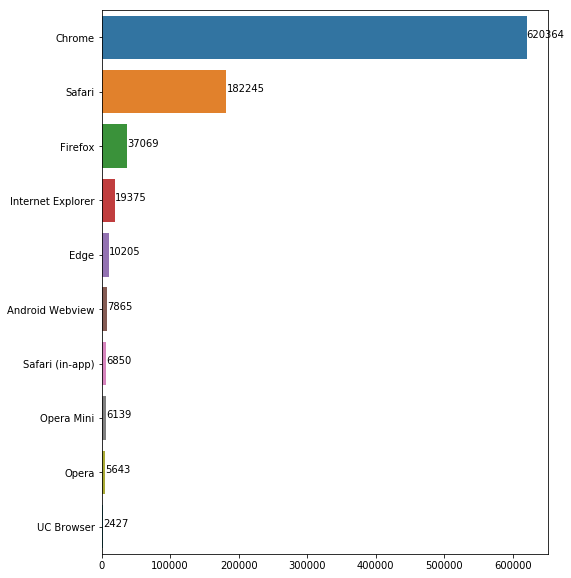

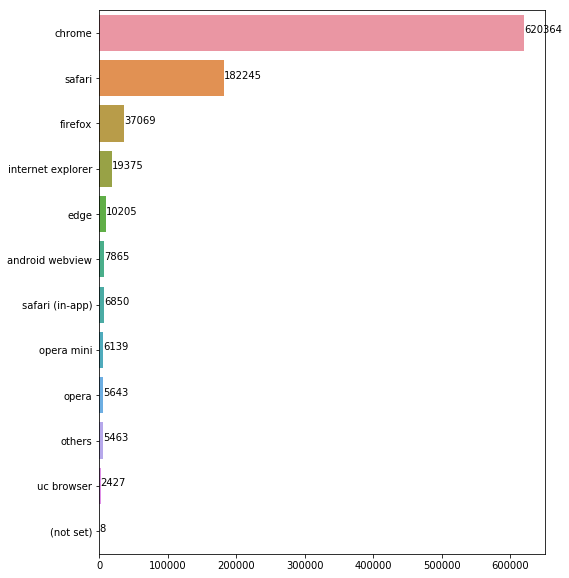

In [638]:
x=train_df1['device.browser'].value_counts()
print("Plot of top 10 device browsers before transformation")
wrang.plots(x[:10])
train_df1['device.browser'] = train_df1['device.browser'].map(lambda x:wrang.browser_wrangling(str(x).lower())).astype('str')
x=train_df1['device.browser'].value_counts()
print("Plot of device browsers after transformation")
wrang.plots(x)


Plot of top 10 Sources before transformation
Plot of Sources after transformation


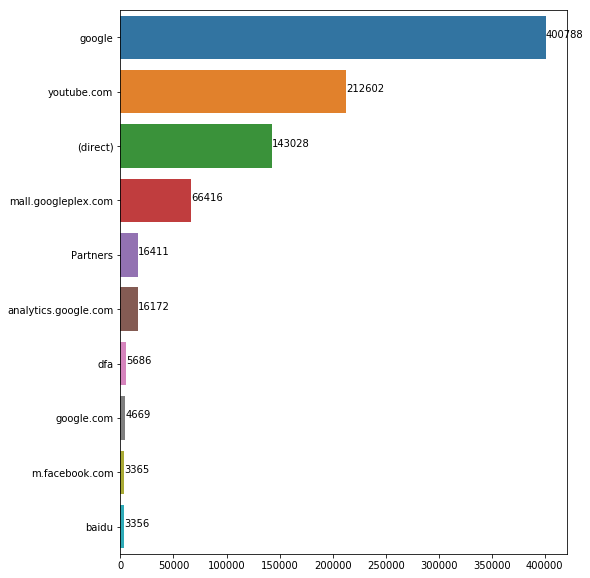

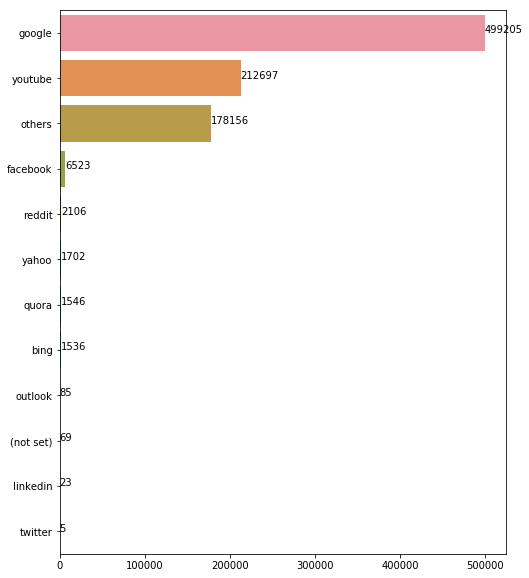

In [639]:
x=train_df1['trafficSource.source'].value_counts()
print("Plot of top 10 Sources before transformation")
wrang.plots(x[:10])
train_df1['trafficSource.source'] = train_df1['trafficSource.source'].map(lambda x:wrang.source_wrangling(str(x).lower())).astype('str')
x=train_df1['trafficSource.source'].value_counts()
print("Plot of Sources after transformation")
wrang.plots(x)


Plot of top 10 Operating Systems before transformation
Plot of Operating Systems after transformation


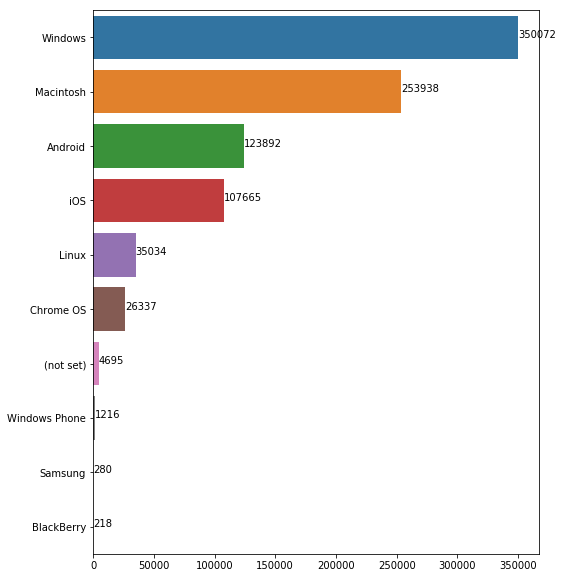

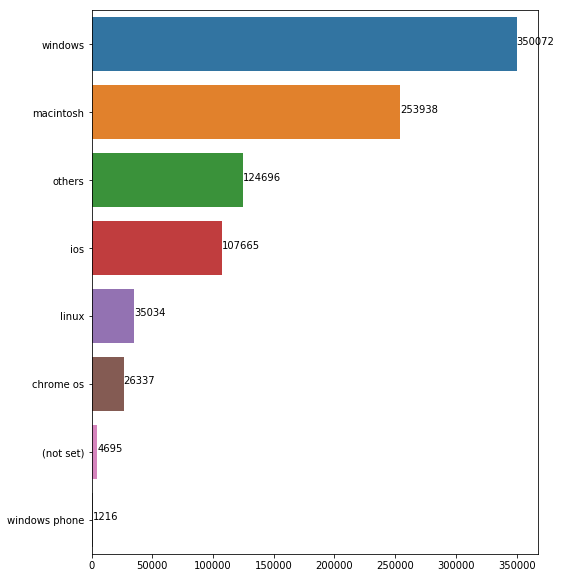

In [640]:
print("Plot of top 10 Operating Systems before transformation")
x=train_df1['device.operatingSystem'].value_counts()
wrang.plots(x[:10])
train_df1['device.operatingSystem'] = train_df1['device.operatingSystem'].map(lambda x:wrang.device_os_wrangling(str(x).lower())).astype('str')
x=train_df1['device.operatingSystem'].value_counts()
print("Plot of Operating Systems after transformation")
wrang.plots(x)

Plot of top 10 Network Domains before transformation
Plot of Network Domains after transformation


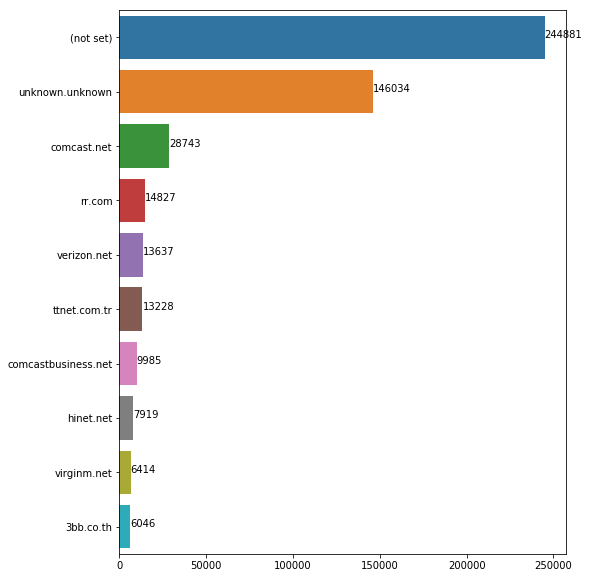

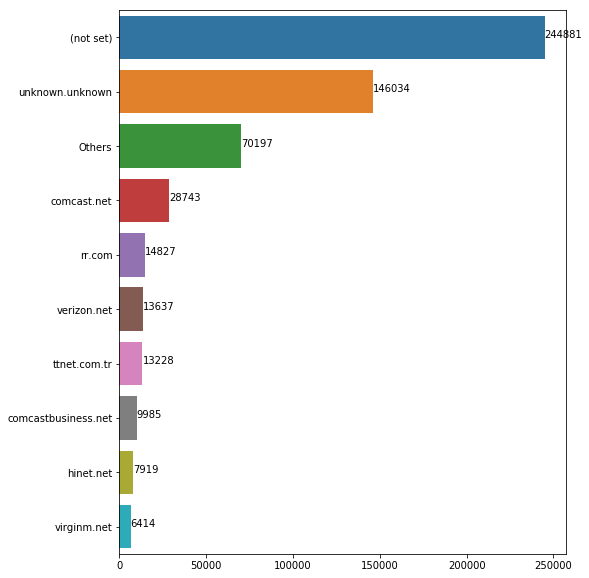

In [641]:
x=train_df1['geoNetwork.networkDomain'].value_counts()
print("Plot of top 10 Network Domains before transformation")
wrang.plots(x[:10])
train_df1 = wrang.nw_domain_wrangling(train_df1)
x=train_df1['geoNetwork.networkDomain'].value_counts()
print("Plot of Network Domains after transformation")
wrang.plots(x[:10])



In [642]:
'''
def process_device(data_df):
    print("process device ...")
    data_df['source.country'] = data_df['trafficSource.source'] + '_' + data_df['geoNetwork.country']
    data_df['campaign.medium'] = data_df['trafficSource.campaign'] + '_' + data_df['trafficSource.medium']
    data_df['browser.category'] = data_df['device.browser'] + '_' + data_df['device.deviceCategory']
    data_df['browser.os'] = data_df['device.browser'] + '_' + data_df['device.operatingSystem']
    return data_df
train_df1 = process_device(train_df1)
'''

'\ndef process_device(data_df):\n    print("process device ...")\n    data_df[\'source.country\'] = data_df[\'trafficSource.source\'] + \'_\' + data_df[\'geoNetwork.country\']\n    data_df[\'campaign.medium\'] = data_df[\'trafficSource.campaign\'] + \'_\' + data_df[\'trafficSource.medium\']\n    data_df[\'browser.category\'] = data_df[\'device.browser\'] + \'_\' + data_df[\'device.deviceCategory\']\n    data_df[\'browser.os\'] = data_df[\'device.browser\'] + \'_\' + data_df[\'device.operatingSystem\']\n    return data_df\ntrain_df1 = process_device(train_df1)\n'

In [643]:
'''
def custom(data):
    print('custom..')
    data['device_deviceCategory_channelGrouping'] = data['device.deviceCategory'] + "_" + data['channelGrouping']
    data['channelGrouping_browser'] = data['device.browser'] + "_" + data['channelGrouping']
    data['channelGrouping_OS'] = data['device.operatingSystem'] + "_" + data['channelGrouping']
    
    for i in ['geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country','geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region','geoNetwork.subContinent']:
        for j in ['device.browser','device.deviceCategory', 'device.operatingSystem', 'trafficSource.source']:
            data[i + "_" + j] = data[i] + "_" + data[j]
    
    data['content.source'] = data['trafficSource.adContent'] + "_" + data['source.country']
    data['medium.source'] = data['trafficSource.medium'] + "_" + data['source.country']
    return data

train_df1 = custom(train_df1)
'''

'\ndef custom(data):\n    print(\'custom..\')\n    data[\'device_deviceCategory_channelGrouping\'] = data[\'device.deviceCategory\'] + "_" + data[\'channelGrouping\']\n    data[\'channelGrouping_browser\'] = data[\'device.browser\'] + "_" + data[\'channelGrouping\']\n    data[\'channelGrouping_OS\'] = data[\'device.operatingSystem\'] + "_" + data[\'channelGrouping\']\n    \n    for i in [\'geoNetwork.city\', \'geoNetwork.continent\', \'geoNetwork.country\',\'geoNetwork.metro\', \'geoNetwork.networkDomain\', \'geoNetwork.region\',\'geoNetwork.subContinent\']:\n        for j in [\'device.browser\',\'device.deviceCategory\', \'device.operatingSystem\', \'trafficSource.source\']:\n            data[i + "_" + j] = data[i] + "_" + data[j]\n    \n    data[\'content.source\'] = data[\'trafficSource.adContent\'] + "_" + data[\'source.country\']\n    data[\'medium.source\'] = data[\'trafficSource.medium\'] + "_" + data[\'source.country\']\n    return data\n\ntrain_df1 = custom(train_df1)\n'

In [644]:
excluded_features = [
    'date', 'fullVisitorId', 'sessionId', 'totals.transactionRevenue', 
    'visitId', 'visitStartTime', 'vis_date', 'nb_sessions', 'max_visits'
]

excluded_features = excluded_features + missing_cols

categorical_features = [
    _f for _f in train_df1.columns
    if (_f not in excluded_features) & (train_df1[_f].dtype == 'object')
]

In [645]:
for f in categorical_features:
    train_df1[f], indexer = pd.factorize(train_df1[f])

In [646]:
req_features = [_f for _f in train_df1.columns if _f not in excluded_features]

In [647]:
train_df2 = train_df1[req_features + ['fullVisitorId']].groupby('fullVisitorId').mean()

In [648]:
train_df2['Revenue_Generating_Flag'].value_counts()

0    713689
1     10114
Name: Revenue_Generating_Flag, dtype: int64

In [649]:
train_df2.head()

,channelGrouping,visitNumber,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,...,totals.pageviews,totals.visits,trafficSource.adwordsClickInfo.page,trafficSource.campaign,trafficSource.medium,trafficSource.source,Revenue_Generating_Flag,day_of_the_week,hour_of_the_day,day_of_the_month
fullVisitorId,,,,,,,,,,,,,,,,,,,,,
4823595352351,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,1.0,...,1.0,1.0,NaN,0.0,0.0,1.0,0,1.0,14.0,1.0
5103959234087,0.0,1.0,0.0,1.0,1.0,3.0,1.0,3.0,33.0,1.0,...,8.0,1.0,NaN,0.0,0.0,0.0,0,6.0,22.0,21.0
10278554503158,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,70.0,1.0,...,8.0,1.0,NaN,0.0,0.0,0.0,0,4.0,5.0,21.0
20424342248747,0.0,1.0,0.0,0.0,0.0,0.0,49.0,3.0,42.0,0.0,...,13.0,1.0,NaN,0.0,0.0,0.0,0,3.0,7.0,1.0
26722803385797,0.0,1.0,4.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,...,2.0,1.0,NaN,0.0,0.0,0.0,0,0.0,10.0,5.0


In [650]:
train_df2.columns

Index(['channelGrouping', 'visitNumber', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews', 'totals.visits',
       'trafficSource.adwordsClickInfo.page', 'trafficSource.campaign',
       'trafficSource.medium', 'trafficSource.source',
       'Revenue_Generating_Flag', 'day_of_the_week', 'hour_of_the_day',
       'day_of_the_month'],
      dtype='object')

In [651]:
y = train_df2['Revenue_Generating_Flag']
X = train_df2.loc[:, train_df2.columns != 'Revenue_Generating_Flag']

In [652]:
del train_df2['Revenue_Generating_Flag']
train_df2 = train_df2.reset_index()

In [653]:
from sklearn.model_selection import train_test_split
train, test, y_train, y_test = train_test_split(X, y,
                                                stratify=y, 
                                                test_size=0.3,random_state=20)

#train_features = [_f for _f in train.columns if _f not in excluded_features]
#train = train[train_features]

In [654]:
print(y_test.value_counts())
y_train.value_counts()

0    214107
1      3034
Name: Revenue_Generating_Flag, dtype: int64


0    499582
1      7080
Name: Revenue_Generating_Flag, dtype: int64

In [655]:
3034/(3034+214107)

0.013972487922594075

In [656]:
7080/(7080+499582)

0.013973812916697918

In [657]:
from imblearn.over_sampling import SMOTE
train.fillna(train.median(),inplace=True)
sm = SMOTE(random_state=12, ratio = 0.2)
x_train_res, y_train_res = sm.fit_sample(train, y_train)
x_train_res = pd.DataFrame(x_train_res)
x_train_res.columns = train.columns
y_train_res = pd.DataFrame(y_train_res)
#y_train_res.columns = y_train.columns

C:\Users\prash\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [658]:
print(train.shape)
print(y_train.shape)
print(x_train_res.shape)
print(y_train_res.shape)

(506662, 25)
(506662,)
(599498, 25)
(599498, 1)


In [659]:
#y_train_res = pd.DataFrame(y_train_res)
print(y_train_res[0].value_counts())
#np.bincount(y_train_res)

0    499582
1     99916
Name: 0, dtype: int64


In [660]:
99916/(99916+499582)

0.16666611064590708

In [661]:
from sklearn import cross_validation
skf = cross_validation.StratifiedKFold(y_train_res[0], n_folds=5)
#kf=KFold(x_train_res.shape[0],n_folds=5,random_state=20)
listfold=list(kf)

In [662]:
for a,b in skf:
    print(y_train_res[0].iloc[a].value_counts())
    print(y_train_res[0].iloc[b].value_counts())

0    399665
1     79932
Name: 0, dtype: int64
0    99917
1    19984
Name: 0, dtype: int64
0    399665
1     79933
Name: 0, dtype: int64
0    99917
1    19983
Name: 0, dtype: int64
0    399666
1     79933
Name: 0, dtype: int64
0    99916
1    19983
Name: 0, dtype: int64
0    399666
1     79933
Name: 0, dtype: int64
0    99916
1    19983
Name: 0, dtype: int64
0    399666
1     79933
Name: 0, dtype: int64
0    99916
1    19983
Name: 0, dtype: int64


In [663]:
79932/(79932+399665)

0.1666649290967208

In [664]:
19984/(19984+99917)

0.16667083677367162

In [665]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn import cross_validation

#acc_table_val = pd.DataFrame(columns = ['Test Values','Fold1_glm','Fold2_glm','Fold3_glm','Fold4_glm','Fold5_glm'])
#acc_table_val['Test Values'] = y_test

acc_table_test = pd.DataFrame(columns = ['Test Values','Fold1_glm','Fold2_glm','Fold3_glm','Fold4_glm','Fold5_glm','Fold1_rf','Fold2_rf','Fold3_rf','Fold4_rf','Fold5_rf','Fold1_xgb','Fold2_xgb','Fold3_xgb','Fold4_xgb','Fold5_xgb'])
acc_table_test['Test Values'] = y_test
cut_off_table = pd.DataFrame(columns=['Folds','Cut_off'])
cut_off_table['Folds'] = ['Folds1','Folds2','Folds3','Folds4','Folds5']

train_features = [_f for _f in x_train_res.columns if _f not in excluded_features]
importances = pd.DataFrame()
oof_reg_preds = np.zeros(x_train_res.shape[0])

alg=LogisticRegression()
#kf=KFold(x_train_res.shape[0],n_folds=5,random_state=20)
#listfold=list(kf)
skf = cross_validation.StratifiedKFold(y_train_res[0], n_folds=5)
test_preds = np.zeros(test.shape[0])
test.fillna(test.median(),inplace=True)

sub_reg_preds = np.zeros(test.shape[0])
i =1
for a,b in skf:
    trn_x, trn_y = x_train_res[train_features].iloc[a], y_train_res[0].iloc[a]
    val_x, val_y = x_train_res[train_features].iloc[b], y_train_res[0].iloc[b]
    #print(trn_x.head())
    trn_x.fillna(trn_x.median(),inplace=True)
    val_x.fillna(val_x.median(),inplace=True)
    lr = LogisticRegression(random_state = 0)
    lr.fit(trn_x,trn_y)
    oof_reg_preds = lr.predict_proba(val_x)[:,1]
    print("Validation AUC-ROC value for Fold {} is {}".format(i,roc_auc_score(val_y, oof_reg_preds)))
    
    from sklearn import metrics
    fpr, tpr, thresholds = metrics.roc_curve(val_y,oof_reg_preds)
    cut_off_table.iloc[i-1,1] = thresholds[np.argmax(tpr - fpr)]
    
    _preds = lr.predict_proba(test[train_features])[:,1]
    acc_table_test.iloc[:,i] = _preds
    i+=1
    #sub_reg_preds += _preds# / len(folds)
    #sub_reg_preds = np.add(sub_reg_preds,_preds)
    
        
avg = (acc_table_test['Fold1_glm'] + acc_table_test['Fold2_glm'] +acc_table_test['Fold3_glm'] + acc_table_test['Fold4_glm'] + acc_table_test['Fold5_glm'])/5.0   
print("Test AUC-ROC value is {}".format(roc_auc_score(acc_table_test['Test Values'], avg)))

C:\Users\prash\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Validation AUC-ROC value for Fold 1 is 0.9772878545337547
Validation AUC-ROC value for Fold 2 is 0.9784855706871843
Validation AUC-ROC value for Fold 3 is 0.9791222758028018
Validation AUC-ROC value for Fold 4 is 0.9790736095916528
Validation AUC-ROC value for Fold 5 is 0.9787388363138413
Test AUC-ROC value is 0.974378051642246


In [666]:
cut_off_table

,Folds,Cut_off
0,Folds1,0.191279
1,Folds2,0.199234
2,Folds3,0.195079
3,Folds4,0.210721
4,Folds5,0.190688


In [590]:
avg.describe()

count    2.171410e+05
mean     5.940438e-02
std      1.504117e-01
min      9.821721e-16
25%      3.486016e-04
50%      4.101075e-03
75%      3.728787e-02
max      1.000000e+00
dtype: float64

In [669]:
avg1 = avg
cut_off_table['Cut_off'].max(axis=0)
avg1 = np.where(avg1<0.20,0,1)
#print(avg)
df_confusion = pd.crosstab(acc_table_test['Test Values'], avg1)
df_confusion

col_0,0,1
Test Values,,
0,198562,15545
1,181,2853


In [670]:
from sklearn.metrics import f1_score
f1_score(acc_table_test['Test Values'], avg1)

0.2662374020156775

In [611]:
from sklearn.model_selection import train_test_split
train, test, y_train, y_test = train_test_split(X, y,
                                                stratify=y, 
                                                test_size=0.3,random_state=20)

from imblearn.over_sampling import SMOTE
train.fillna(train.median(),inplace=True)
sm = SMOTE(random_state=12, ratio = 0.2)
x_train_res, y_train_res = sm.fit_sample(train, y_train)
x_train_res = pd.DataFrame(x_train_res)
x_train_res.columns = train.columns
y_train_res = pd.DataFrame(y_train_res)
#y_train_res.columns = y_train.columns

C:\Users\prash\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [673]:
from sklearn.ensemble import RandomForestClassifier

train_features = [_f for _f in x_train_res.columns if _f not in excluded_features]
importances = pd.DataFrame()
oof_reg_preds = np.zeros(x_train_res.shape[0])
sub_reg_preds = np.zeros(test.shape[0])

#acc_table = pd.DataFrame(columns = ['Test Values','Fold1','Fold2','Fold3','Fold4','Fold5'])
#acc_table['Test Values'] = y_test

cut_off_table = pd.DataFrame(columns=['Folds','Cut_off'])
cut_off_table['Folds'] = ['Folds1','Folds2','Folds3','Folds4','Folds5']

test.fillna(test.median(),inplace=True)

i =6
for a,b in skf:
    trn_x, trn_y = x_train_res[train_features].iloc[a], y_train_res[0].iloc[a]
    val_x, val_y = x_train_res[train_features].iloc[b], y_train_res[0].iloc[b]
    
    #trn_x.fillna(trn_x.median(),inplace=True)
    #val_x.fillna(val_x.median(),inplace=True)
    
    clf_rf = RandomForestClassifier(n_estimators=200,random_state=10)
    clf_rf.fit(trn_x, trn_y)
    
    oof_reg_preds = clf_rf.predict_proba(val_x)[:,1]
    print("Validation AUC-ROC value for Fold {} is {}".format(i-5,roc_auc_score(val_y, oof_reg_preds)))
    
    from sklearn import metrics
    fpr, tpr, thresholds = metrics.roc_curve(val_y,oof_reg_preds)
    cut_off_table.iloc[i-6,1] = thresholds[np.argmax(tpr - fpr)]
    
    _preds = clf_rf.predict_proba(test[train_features])[:,1]
    acc_table_test.iloc[:,i] = _preds
    i+=1
    #_preds[_preds < 0] = 0
    #sub_reg_preds = np.add(sub_reg_preds,_preds)

avg = (acc_table_test['Fold1_rf'] + acc_table_test['Fold2_rf'] +acc_table_test['Fold3_rf'] + acc_table_test['Fold4_rf'] + acc_table_test['Fold5_rf'])/5.0   
print("Test AUC-ROC value is {}".format(roc_auc_score(acc_table_test['Test Values'], avg)))

C:\Users\prash\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Validation AUC-ROC value for Fold 1 is 0.9953646960323744
Validation AUC-ROC value for Fold 2 is 0.9998081908960267
Validation AUC-ROC value for Fold 3 is 0.999824144930493
Validation AUC-ROC value for Fold 4 is 0.9998069411183341
Validation AUC-ROC value for Fold 5 is 0.9997753234570614
Test AUC-ROC value is 0.9861578976774342


In [674]:
cut_off_table

,Folds,Cut_off
0,Folds1,0.05
1,Folds2,0.51
2,Folds3,0.585
3,Folds4,0.555
4,Folds5,0.56


In [679]:
avg1 = avg
cut_off_table['Cut_off'].max(axis=0)
avg1 = np.where(avg1<0.585,0,1)
#print(avg)
df_confusion = pd.crosstab(acc_table_test['Test Values'], avg1)
df_confusion

col_0,0,1
Test Values,,
0,213172,935
1,1899,1135


In [680]:
from sklearn.metrics import f1_score
f1_score(acc_table_test['Test Values'], avg1)

0.44474921630094044

In [681]:
import xgboost as xgb
from sklearn.cross_validation import KFold

train_features = [_f for _f in x_train_res.columns if _f not in excluded_features]
importances = pd.DataFrame()
oof_reg_preds = np.zeros(x_train_res.shape[0])
sub_reg_preds = np.zeros(test.shape[0])

acc_table = pd.DataFrame(columns = ['Test Values','Fold1','Fold2','Fold3','Fold4','Fold5'])
acc_table['Test Values'] = y_test

cut_off_table = pd.DataFrame(columns=['Folds','Cut_off'])
cut_off_table['Folds'] = ['Folds1','Folds2','Folds3','Folds4','Folds5']

i =11
for a,b in skf:
    trn_x, trn_y = x_train_res[train_features].iloc[a], y_train_res[0].iloc[a]
    val_x, val_y = x_train_res[train_features].iloc[b], y_train_res[0].iloc[b]
    #print(trn_x.head())
    #trn_x.fillna(trn_x.median(),inplace=True)
    #val_x.fillna(val_x.median(),inplace=True)
    clf = xgb.XGBClassifier(
            num_leaves=31,
            learning_rate=0.03,
            n_estimators=500,
            subsample=.9,
            colsample_bytree=.9,
            random_state=1
        )
    clf.fit(
        trn_x, trn_y,
        eval_set=[(val_x,val_y)],
        early_stopping_rounds=20,
        verbose=100,
        eval_metric='auc'
        #objective='multi:softprob'
        )
    imp_df = pd.DataFrame()
    imp_df['feature'] = train_features
    imp_df['gain'] = clf.feature_importances_

    imp_df['fold'] = i
    importances = pd.concat([importances, imp_df], axis=0)
    
    best_iteration = clf.get_booster().best_ntree_limit

    oof_reg_preds = clf.predict_proba(val_x,best_iteration)[:,1]
    #oof_reg_preds = lr.predict_proba(val_x)[:,1]
    #print(oof_reg_preds)
    print("Validation AUC-ROC value for Fold {} is {}".format(i-10,roc_auc_score(val_y, oof_reg_preds)))
    
    from sklearn import metrics
    fpr, tpr, thresholds = metrics.roc_curve(val_y,oof_reg_preds)
    cut_off_table.iloc[i-11,1] = thresholds[np.argmax(tpr - fpr)]
    
    best_iteration = clf.get_booster().best_ntree_limit
    #print(best_iteration)
    #oof_reg_preds[oof_reg_preds < 0] = 0
    _preds = clf.predict_proba(test[train_features],best_iteration)[:,1]
    acc_table_test.iloc[:,i] = _preds
    i+=1
    #_preds[_preds < 0] = 0
    #sub_reg_preds = np.add(sub_reg_preds,_preds)
avg = (acc_table_test['Fold1_xgb'] + acc_table_test['Fold2_xgb'] +acc_table_test['Fold3_xgb'] + acc_table_test['Fold4_xgb'] + acc_table_test['Fold5_xgb'])/5.0   
print("Test AUC-ROC value is {}".format(roc_auc_score(acc_table_test['Test Values'], avg)))
#print("Test AUC-ROC value is {}".format(roc_auc_score(y_test, sub_reg_preds)))

[0]	validation_0-auc:0.923637
Will train until validation_0-auc hasn't improved in 20 rounds.
[100]	validation_0-auc:0.990837
[200]	validation_0-auc:0.992541
[300]	validation_0-auc:0.99364
[400]	validation_0-auc:0.99411
[499]	validation_0-auc:0.994342
Validation AUC-ROC value for Fold 1 is 0.9943419686658581
[0]	validation_0-auc:0.982098
Will train until validation_0-auc hasn't improved in 20 rounds.
[100]	validation_0-auc:0.993933
[200]	validation_0-auc:0.99611
[300]	validation_0-auc:0.997663
[400]	validation_0-auc:0.998554
[499]	validation_0-auc:0.998964
Validation AUC-ROC value for Fold 2 is 0.9989640638581346
[0]	validation_0-auc:0.973368
Will train until validation_0-auc hasn't improved in 20 rounds.
[100]	validation_0-auc:0.994184
[200]	validation_0-auc:0.996312
[300]	validation_0-auc:0.997683
[400]	validation_0-auc:0.998608
[499]	validation_0-auc:0.998997
Validation AUC-ROC value for Fold 3 is 0.9989965316048887
[0]	validation_0-auc:0.972745
Will train until validation_0-auc has

In [682]:
cut_off_table

,Folds,Cut_off
0,Folds1,0.0443643
1,Folds2,0.444984
2,Folds3,0.460415
3,Folds4,0.458805
4,Folds5,0.402346


In [683]:
avg1 = avg
cut_off_table['Cut_off'].max(axis=0)
avg1 = np.where(avg1<0.458805,0,1)
df_confusion = pd.crosstab(acc_table_test['Test Values'], avg1)
from sklearn.metrics import f1_score
print(f1_score(acc_table_test['Test Values'], avg1))
#df_confusion = pd.crosstab(acc_table_test['Test Values'], avg1)
df_confusion

0.499874843554443


col_0,0,1
Test Values,,
0,211148,2959
1,1037,1997


In [684]:
#acc_table_test.iloc[:,1:16]
ensemble_value = acc_table_test.iloc[:,1:15].mean(axis=1)
print("Ensembled Test AUC-ROC value is {}".format(roc_auc_score(acc_table_test['Test Values'], ensemble_value)))

Ensembled Test AUC-ROC value is 0.9859934081530259


In [685]:
avg1_v1 = np.where(ensemble_value<0.458805,0,1)
df_confusion = pd.crosstab(acc_table_test['Test Values'], avg1_v1)
from sklearn.metrics import f1_score
print(f1_score(acc_table_test['Test Values'], avg1_v1))
#df_confusion = pd.crosstab(acc_table_test['Test Values'], avg1)
df_confusion

0.5158813263525305


col_0,0,1
Test Values,,
0,210763,3344
1,817,2217
